# Connected Components of a disconnected (undirected) graph 
We have prerviosly implemented an algorithm for decomposition of a graph to its connected components based on Breadth-irst Search strategy, see the connected_components() method in the Graph class. Now we are proposing a new algorithm based on Deapth-First Search strategy for undirected graphs. 

In [1]:
import sys
sys.path.append('C:\\Users\\acer\\basic_algorithms_python\\graph')
sys.path.append('C:\\Users\\acer\\basic_algorithms_python\\stack')

from graph import Graph
from stack import Stack

# Depth-First Search function

In [2]:
# This is copied from depth_first_search.py
def dfs(graph, vertex):
    def next(v):
        temp = None
        for x in graph.adj_list[v]:
            if x not in visited_list:
                temp = x
                break
        return temp
    visited_list = [vertex]
    visited_stack = Stack(vertex)
    current_vertex = vertex
    backward = False
    i = 0  # Just to track the order of discovering new vertices
    while visited_stack.height > 0:
        i += 1
        print(i, "  Stack = ", visited_stack)  # Just to track the order of discovering new vertices
        if backward:
            current_vertex = visited_stack.pop()
        next_vertex = next(current_vertex)
        backward = False
        if next_vertex:
            if (visited_stack.top and visited_stack.top.value != current_vertex) or (visited_stack.top is None and next(current_vertex)):
                visited_stack.push(current_vertex)
            current_vertex = next_vertex
            visited_stack.push(next_vertex)
            visited_list.append(next_vertex)
        else:
            backward = True
    return visited_list


## A disconnected graph

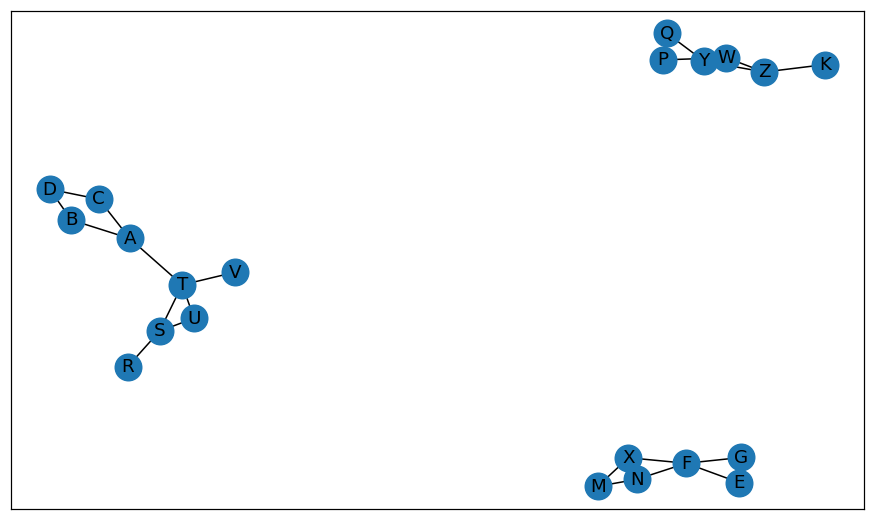

In [3]:
from matplotlib.pyplot import figure
# Inside of the Graph class, we have imported "matplotlib.pyplot" and "networkx".
g = Graph()
edges = [["T", "S"], ["S", "R"], ["U", "T"], ["V", "T"], ["S", "U"], ["A", "T"], ["A", "B"], 
         ["A", "C"], ["C", "D"], ["D", "B"], 
         ["E", "F"], ["G", "E"], ["G", "F"], ["X", "F"], ["X", "M"], ["M", "N"], ["F", "N"], 
         ["W", "Y"], ["W", "Z"], ["Z", "Y"], ["Z", "K"], ["W", "P"], ["P", "Q"], ["Q", "Y"]]
g.from_edge_list(edges)
# ploting the graph
figure(figsize=(10, 6), dpi=110)
g.plot_connections()

In [4]:
def connected_components_partition(graph):
    vertices = list(graph.adj_list.keys()).copy()
    partition = []
    components = []
    while len(vertices) > 0:
        v0 = vertices[0]
        temp = dfs(graph, v0)
        vertices = [v for v in vertices if v not in temp]
        partition.append(temp)
        new_component = Graph()
        for vertex in temp:
            new_component.adj_list[vertex] = graph.adj_list[vertex]
        components.append(new_component)
        print(temp)
        print(new_component)
    return components, partition

In [5]:
components, partition = connected_components_partition(g)

1   Stack =  (top)T -> None
2   Stack =  (top)S -> T -> None
3   Stack =  (top)R -> S -> T -> None
4   Stack =  (top)R -> S -> T -> None
5   Stack =  (top)S -> T -> None
6   Stack =  (top)U -> S -> T -> None
7   Stack =  (top)U -> S -> T -> None
8   Stack =  (top)S -> T -> None
9   Stack =  (top)T -> None
10   Stack =  (top)V -> T -> None
11   Stack =  (top)V -> T -> None
12   Stack =  (top)T -> None
13   Stack =  (top)A -> T -> None
14   Stack =  (top)B -> A -> T -> None
15   Stack =  (top)D -> B -> A -> T -> None
16   Stack =  (top)C -> D -> B -> A -> T -> None
17   Stack =  (top)C -> D -> B -> A -> T -> None
18   Stack =  (top)D -> B -> A -> T -> None
19   Stack =  (top)B -> A -> T -> None
20   Stack =  (top)A -> T -> None
21   Stack =  (top)T -> None
['T', 'S', 'R', 'U', 'V', 'A', 'B', 'D', 'C']
{'T': ['S', 'U', 'V', 'A'], 'S': ['T', 'R', 'U'], 'R': ['S'], 'U': ['T', 'S'], 'V': ['T'], 'A': ['T', 'B', 'C'], 'B': ['A', 'D'], 'D': ['C', 'B'], 'C': ['A', 'D']}
1   Stack =  (top)E -> No

{'T': ['S', 'U', 'V', 'A'], 'S': ['T', 'R', 'U'], 'R': ['S'], 'U': ['T', 'S'], 'V': ['T'], 'A': ['T', 'B', 'C'], 'B': ['A', 'D'], 'D': ['C', 'B'], 'C': ['A', 'D']}


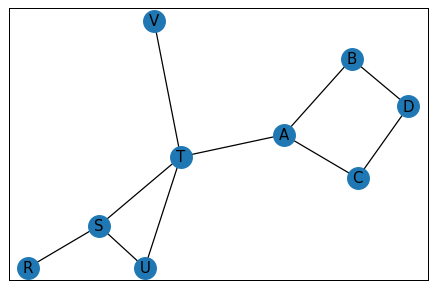

{'E': ['F', 'G'], 'F': ['E', 'G', 'X', 'N'], 'G': ['E', 'F'], 'X': ['F', 'M'], 'M': ['X', 'N'], 'N': ['M', 'F']}


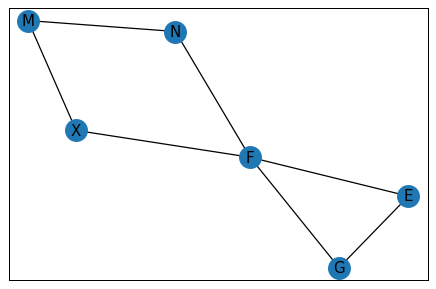

{'W': ['Y', 'Z', 'P'], 'Y': ['W', 'Z', 'Q'], 'Z': ['W', 'Y', 'K'], 'K': ['Z'], 'Q': ['P', 'Y'], 'P': ['W', 'Q']}


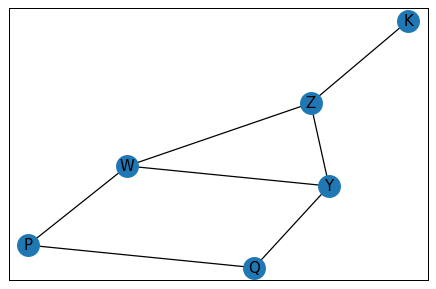

In [6]:
for graph in components:
    print(graph)
    figure(figsize=(6, 4), dpi=90)
    graph.plot_connections()